# Exercise - Maximum a posterior for the linear regression model

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Python Modules](#Python-Modules)
  * [Knowledge](#Knowledge)
  * [Modules](#Python-Modules)
* [Recap](#Recap)
  * [Linear Regression](#Linear-Regression)
  * [Normal Distribution](#Normal-Distribution)
* [Exercises](#Exercises)
  * [Exercise - Proof](#Exercise---Covariance-Matrix)
* [Literature](#Literature)
* [Licenses](#Licenses)

## Introduction

One of the first (or even the first) machine learning model students learn is the linear regression. Typically it is described from the point of view of linear algebra. In this notebook you will see, that it is also possible to describe it with a probabilistic viewpoint, regularization included.

## Requirements

### Knowledge

To complete this exercise notebook, you should possess knowledge about the following topics.
- Linear regression
- Multivariate gaussian
- Variance
- Covariance
- Covariance matrix

The following material can help you to acquire this knowledge:
* Gaussian, variance, covariance, covariance matrix:
 * Chapter 3 of the [Deep Learning Book](http://www.deeplearningbook.org/) [GOO16]
 * Chapter 1 of the book Pattern Recognition and Machine Learning by Christopher M. Bishop [BIS07]
* Univariate gaussian:
 * [Video](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution) and the follwoing of Khan Academy [KHA18]
* Multivariate gaussian:
 * Video PP 6.1 and following in the playlist [Probability Primer](https://www.youtube.com/watch?v=TC0ZAX3DA88&t=9s&index=35&list=PL17567A1A3F5DB5E4) of the youtube user *mathematicalmonk* [MAT18]

### Python Modules

In [1]:
# External Modules
import daft
from matplotlib import rc
rc("font", family="serif", size=18)
rc("text", usetex=False)
%matplotlib inline

In [2]:
def plot_linear_regression_model():
    
    pgm = daft.PGM([5.9, 4.5], origin=[-1.0, 0.0], label_params={'fontsize':18})

    pgm.add_node(daft.Node("sigma", r"$\sigma$", 4, 1, fixed=True))
    pgm.add_node(daft.Node("gamma", r"$\gamma$", 0, 3, fixed=True))
    
    pgm.add_node(daft.Node("y", r"$y^{(i)}$", 3, 1, scale=2))
    pgm.add_node(daft.Node("w", r"$w$", 1, 3, scale=2))

    # Data.
    pgm.add_node(daft.Node("x", r"$x^{(i)}$", 3, 3, observed=True, scale=2))

    # Add in the edges.
    pgm.add_edge("sigma", "y")
    pgm.add_edge("gamma", "w")
    pgm.add_edge("w", "y")  
    pgm.add_edge("x", "y")

    # And a plate.
    pgm.add_plate(daft.Plate([2.2, 0.2, 1.5, 3.5], label=r"$i = 1, \cdots, n$", shift=-0.1))


    # Render
    pgm.render()


## Recap

This chapter gives a short recap over the linear regression with regularization and the multivariate gaussian distribution. It is only meant for refreshment and is not a substitute for a deep involvement with the topic.

### Linear Regression

In linear regression we want to train a model to fit our data $D_{train} = \{(x^{(1)},y^{(1)}) \ldots (x^{(m)},y^{(m)})\}$. The target $y$ is a single number and the features $x$ can be anything, e.g. also a single number or a $p$-dimensional vector.

Considering polynomial regression for example the model could be defined with:
$$
h_w(x^{(i)}) = w_0 + w_1 x{(i)} + w_2 x^{(i)2} + w_3 x^{(i)3}
$$

And the loss for the whole training data as mean squared error:
$$
J_D(W)=\frac{1}{2m}\sum_{i=1}^{m}{(h_w(x^{(i)})-y^{(i)})^2}
$$

To prevent overfitting we can use $L^2$-regularization, adding penalty for too large weights:
$$
J_D(W)=\frac{1}{2m}\sum_{i=1}^{m}{(h_w(x^{(i)})-y^{(i)})^2} + \lambda \sum_{i=1}^3 w_i^2
$$

For simplification, it is possible to omit the normalizing term:
$$
J_D(W)=\sum_{i=1}^{m}{(h_w(x^{(i)})-y^{(i)})^2} + \lambda \sum_{i=1}^3 w_i^2
$$

Finally, the task is to find the weights, which minimize the costs:
$$
\text{arg}\min_w \left(\sum_{i=1}^{m}{(h_w(x^{(i)})-y^{(i)})^2} + \lambda \sum_{i=1}^3 w_i^2 \right)
$$

This is typically done with gradient descent, but that is not necessary for the context of this notebook.

### Normal Distribution

In the general case, a random variable $\bf z$ is said to be normally distributed, if its density is:

$$
\mathcal N({\bf z} \mid \mu, \Sigma) =  
\frac{1}{ \left( (2\pi)^p \text{det}(\Sigma) \right)^{1/2}  }
\exp\left( - \frac{1}{2} ({\bf z}-\mu)^T \Sigma^{-1} ({\bf z}-\mu)  \right)
$$

with:
- $\bf z$ the column vector
- $p$ the dimesion of the vectors $\bf z$ 
- $\mu$ the expected vector (or empirical mean of $n$ examples if $n \rightarrow \infty$)
- $\Sigma$ the covariance matrix

## Exercises

### Linear Regression Model

For the probabilistic view of linear regression, first take a look at the following plot by executing the code cell below:

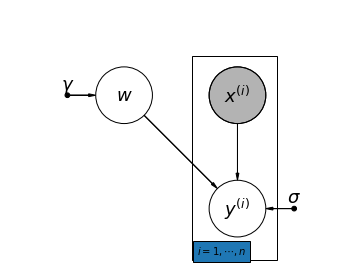

In [3]:
plot_linear_regression_model()

Two things here might be unfamiliar: The *sigma* ($\sigma$) and the *gamma* ($\gamma$).

The *sigma* ($\sigma$) depicts, we assume that the data is noisy, which is given by a Gaussian (motivated by the central limit theorem). So the model can written as:

$$
 p(y \mid X, w) = \mathcal N (y \mid X w, \sigma^2 \mathbb{1})
$$

with
- the (training) data matrix $X$
- identity matrix $\mathbb{1}$

$$ h_w(X) = 
X w = \begin{pmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
1 &x_1^{(2)} & x_2^{(2)} &\dots  & x_n^{(2)} \\
\vdots & \vdots & \vdots  & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \dots  & x_n^{(m)}
\end{pmatrix} 
\begin{pmatrix}
w_0  \\
w_1  \\
w_2  \\
\vdots \\
w_n
\end{pmatrix} 
$$

$$
h_w(x^{(i)}) = w^T x'^{(i)}
$$

with $$
x'^{(i)}= \begin{pmatrix}1 \\ x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)}\end{pmatrix} 
$$ 

The *sigma* ($\sigma$):

For the weights we also assume Gaussian, so the prior for $w$ is:

$$
p(w) = \mathcal N (w \mid 0, \gamma^2 \mathbb 1)
$$

$w$ is the parameter vector: 
$$
w^T = (w_0, w_1, \dots, w_n)
$$

### MAP (Maximum a posterior)

The MAP for $w$ given the data $(X, y)$ is
$$
\text{arg}\max_w p(w \mid X, y)
$$

by Bayes rule we get

$$
\text{arg}\max_w p(w \mid X, y) = \text{arg}\max_w \frac{p(y \mid X, w) p(w \mid X)}{p(y\mid X)}
$$

We can read from the graph $w \perp X $ ($w$ independant of $X$). So we have:

$$
\text{arg}\max_w p(w \mid X, y) = \text{arg}\max_w \frac{p(y \mid X, w) p(w)}{p(y\mid X)}
$$

The denominator is w.r.t. $w$ a constant:
$$
\text{arg}\max_w p(w \mid X, y) = \text{arg}\max_w p(y \mid X, w) p(w)
$$

With the model assumptions above:
$$
\text{arg}\max_w p(w \mid X, y) = \text{arg}\max_w  \left( \mathcal N (y \mid Xw, \sigma^2 \mathbb{1}) \mathcal N (w \mid 0, \gamma^2 \mathbb 1)\right)
$$    

### Exercise - Proof

**Task:**

Show that the MAP of the model above is equivalent to the minimization of the squared error cost with $L^2$-regularization:
$$
\text{arg}\max_w p(w \mid X, y) = \text{arg}\min_w \left(\sum_i^m (w^T x'^{(i)}- y^{(i)})^2 + \lambda \sum_i w_i^2 \right)
$$

**Hint:**

Maximization of $p(w \mid X, y)$ is equivalent to minimization of $-\log p(w \mid X, y)$.

## Literature

<table>
        <tr>
        <td>
            <a name="BIS07"></a>[BIS07]
        </td>
        <td>
            Christopher M. Bishop, Pattern recognition and machine learning, 5th Edition. Springer 2007, ISBN 9780387310732.
        </td>
    </tr>
    <tr>
        <td>
            <a name="GOO16"></a>[GOO16]
        </td>
        <td>
            Goodfellow, Ian, et al. Deep learning. Vol. 1. Cambridge: MIT press, 2016.
        </td>
    </tr>
        <tr>
        <td>
            <a name="MAT18"></a>[MAT18]
        </td>
        <td>
            mathematicalmonk. (2018, September 30). (ML 15.3) Logistic regression (binary) - intuition. And following in the playlist Machine Learning. Retrieved from https://www.youtube.com/watch?v=-Z2a_mzl9LM&list=PLD0F06AA0D2E8FFBA&t=740s&index=110
        </td>
    </tr>
        </tr>
        <tr>
        <td>
            <a name="KHA18"></a>[KHA18]
        </td>
        <td>
            Khan Academy. (2018, October 05). Deep definition of the normal distribution. And following in the playlist. Retrieved from https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise - Maximum a posterior for the linear regression model <br/>
by Christian Herta, Klaus Strohmenger<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.